In [0]:
import numpy as np
from matplotlib import pyplot as plt
import scipy.stats as ss

This notebook gathers all of the left and right error for each spectral type. We can compare the left and right error for each spectral type as well as comparing the spectral types against eachother.  Here I have put them all on one graph with a shift to easily scan across and notice the differences. 

In [0]:
%matplotlib inline

Intrinsic colors and spectral types from Dr. Larson's original code. There are 61 Spectral type in total and we have the h-k and j-h in a separate array for each spectral type. 

In [0]:
intHK=np.array([-0.1,-0.09,-0.09,-0.09,-0.09,-0.08,-0.09,-0.06,-0.07,-0.05,-0.06,-0.05,-0.05,-0.03,0,0.0025,0.005,0.0083,
            0.0117,0.015,0.02,0.025,0.0267,0.0283,0.03,0.0325,0.035,0.0367,0.0383,0.04,0.0425,0.045,0.0467,0.0483,
            0.05,0.051,0.052,0.0535,0.055,0.0575,0.06,0.06375,0.0675,0.07125,0.075,0.0825,0.09,0.0975,0.105,0.11,0.12,
            0.13,0.14217,0.1533,0.165,0.2,0.21,0.25,0.275,0.32,0.37])

intJH=np.array([-0.065,-0.065,-0.075,-0.095,-0.095,-0.075,-0.025,-0.045,-0.035,-0.045,-0.025,-0.025,-0.005,0.005,0,0.01,
            0.02,0.033,0.0467,0.06,0.075,0.09,0.103,0.117,0.13,0.1475,0.165,0.187,0.208,0.23,0.258,0.285,0.292,0.298,
            0.305,0.3125,0.32,0.325,0.33,0.35,0.37,0.39,0.41,0.43,0.45,0.475,0.5,0.54,0.58,0.61,0.635,0.66,0.6717,
            0.683,0.695,0.68,0.665,0.62,0.6,0.62,0.6])

SpType=np.array(['O6V','O7V','O8V','O9V','B0V','B1V','B2V','B3V','B4V','B5V','B6V','B7V','B8V','B9V',
            'A0V','A1V','A2V','A3V','A4V','A5V','A6V','A7V','A8V','A9V',
            'F0V','F1V','F2V','F3V','F4V','F5V','F6V','F7V','F8V','F9V',
            'G0V','G1V','G2V','G3V','G4V','G5V','G6V','G7V','G8V','G9V',
            'K0V','K1V','K2V','K3V','K4V','K5V','K6V','K7V','K8V','K9V',
            'M0V','M1V','M2V','M3V','M4V','M5V','M6V'])

x=np.arange(intHK.size)



Simulating uncertainty in observed colors with knowledge of spectral type from Monte Carlo. 

In [0]:
def prob_bins(x,meanbin,stdbin):
    # Create the probability distribution:
    lowedge, highedge = np.arange(len(x))-0.5,np.arange(len(x))+0.5 # put items at bin centers
    prob_bins = ss.norm.cdf(highedge, loc=meanbin, 
                            scale = stdbin)-ss.norm.cdf(lowedge, loc=meanbin, scale = stdbin)
    prob_bins = prob_bins / prob_bins.sum() # normalize the probabilities so their sum is 1

    return prob_bins

Here we create 2D arrays for the right error and the left error. In our case these will be the values that are more than 1.6 and those that are less than 1.6. I have also created an array for the number of data points we will collect for each spectral types. We will change the line of sight 91 times going from 0.1 to 1.0in steps of 0.01. At this point we will also assign each spectral type a number for its position in the pervious array: SpType, this will be labled spytpes. 

In [0]:
RMSLESS=np.zeros((61,91))          #Making arrays to hold all the information for left and right for all the spectral types. 
RMSMORE=np.zeros((61,91))


los=np.arange(0.1,1.01,0.01)  #steps of los to take
sptypes = np.arange(0,61,1)  #number of spectral types


In the next cell we make all of our calculations for each spectral type to find the left and right error. First we set the standard deviation bin width to 2 and the line of sight of R to 1.6. As we run through each spectral type we change the line of sight from 0.1 to 1.0 in steps of 0.01. For each line of sight (91 in total) we calculate the standard deviation R and then collect the absolute value of parts that are less than 1.6 and more than 1.6 and put them into the 2D arrays RMSLESS and RMSMORE respectivly. 

In [6]:
#now to make a function that will put the left and right side of each spectral type into my 2d array


for k in sptypes:  #going through each spectral type and assigning it to meanbin 
  meanbin = k
  stdbins = 2
  
  for i in range(0,90,1):       #changing the losEHK from 0.1 to 1 
    losR=1.6
    losEHK=los[i]         #this goes from 0.1 to 1 in incriments of 0.1
    losEJH=losR*losEHK

    # Calculate the error-free photometry, all spectral types
    simJH=losEJH+intJH
    simHK=losEHK+intHK
  
  
    # Sample the probability distribution:
    # customize the probability distribution
    prob = prob_bins(x,meanbin,stdbins) 
    # randomly choose a set of bin indices based on that probability
    nums = np.random.choice(x, size = 100000, p = prob) 

    R=(simJH[meanbin]-intJH[nums])/(simHK[meanbin]-intHK[nums])

  
    RMSl=np.sqrt(np.mean((R[R<1.6]-1.6)**2))  #RMS_R <1.6
    RMSg=np.sqrt(np.mean((R[R>1.6]-1.6)**2))  #RMS_R >1.6

    RMSLESS[k][i]=RMSl   #RMS less than 1.6 array for spectral type l position i
    RMSMORE[k][i]=RMSg  #RMS greater than 1.6 array for spectral type l position i 
    

/usr/local/lib/python2.7/dist-packages/numpy/core/fromnumeric.py:2957: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python2.7/dist-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:23: RuntimeWarning: divide by zero encountered in divide



From earlier investigation we noticed that we have some values that are 15 magnitudes higher than all the other values. Below I have marked out where those values accour and the only trend I can see  is that the outlirs ocur in K type and M type stars. 

In [7]:
##identifying all the outliers in standard bin 2##
total=0
for k in range(0,60):#looking at each spectral type
  name=SpType[k]
  for i in range(0,90):    #looking through each deviation for each line of sight value
    if RMSLESS[k][i]>100:
      print('LESS Outlier:',name,'bin:',k, '  los value:', i, RMSLESS[k][i] )       #printing out positions of outliers and their values
      total=total+1
      
    if RMSMORE[k][i]>100:
      print('MORE Outlier:',name,'bin:',k, '  los value:', i, RMSMORE[k][i])        #printing out positions of outliers and their values
      total=total+1
   
  
print('Total Number of outliers:', total)

('LESS Outlier:', 'K2V', 'bin:', 46, '  los value:', 1, inf)
('MORE Outlier:', 'K5V', 'bin:', 49, '  los value:', 0, 141731911949210.47)
('MORE Outlier:', 'K5V', 'bin:', 49, '  los value:', 4, inf)
('MORE Outlier:', 'K6V', 'bin:', 50, '  los value:', 3, inf)
('LESS Outlier:', 'K6V', 'bin:', 50, '  los value:', 15, 22825789318993.79)
('MORE Outlier:', 'K7V', 'bin:', 51, '  los value:', 2, inf)
('LESS Outlier:', 'K7V', 'bin:', 51, '  los value:', 9, 5737263725534544.0)
('LESS Outlier:', 'K7V', 'bin:', 51, '  los value:', 14, 7998392938210004.0)
('MORE Outlier:', 'M0V', 'bin:', 54, '  los value:', 1, inf)
('MORE Outlier:', 'M1V', 'bin:', 55, '  los value:', 2, inf)
('MORE Outlier:', 'M1V', 'bin:', 55, '  los value:', 7, inf)
('MORE Outlier:', 'M2V', 'bin:', 56, '  los value:', 1, inf)
('MORE Outlier:', 'M2V', 'bin:', 56, '  los value:', 6, inf)
('MORE Outlier:', 'M3V', 'bin:', 57, '  los value:', 2, inf)
('Total Number of outliers:', 14)


Below are all the Not a Number values for standard bin 2. Im not exactly sure how on these occur but there seems to be quite a few of them and they only occur with a selecte few spectral types, in our case B2V AND K7V. Almost all the less than 1.6 values are nan values for these two spectral type. I wonder if it has to do with the spectral type specifically or just something about their initial values is skewed. 

In [8]:
## finding non a number values (nan)## 
for k in range(0,60):
  name=SpType[k]
  for i in range(0,90):
    if np.isnan(RMSLESS[k][i]) == True:
      print('LESS NaN:', name,'bin:', k,' los value:',i, RMSLESS[k][i])

('LESS NaN:', 'B2V', 'bin:', 6, ' los value:', 0, nan)
('LESS NaN:', 'B2V', 'bin:', 6, ' los value:', 1, nan)
('LESS NaN:', 'B2V', 'bin:', 6, ' los value:', 2, nan)
('LESS NaN:', 'B2V', 'bin:', 6, ' los value:', 3, nan)
('LESS NaN:', 'B2V', 'bin:', 6, ' los value:', 4, nan)
('LESS NaN:', 'B2V', 'bin:', 6, ' los value:', 5, nan)
('LESS NaN:', 'B2V', 'bin:', 6, ' los value:', 8, nan)
('LESS NaN:', 'B2V', 'bin:', 6, ' los value:', 9, nan)
('LESS NaN:', 'B2V', 'bin:', 6, ' los value:', 10, nan)
('LESS NaN:', 'B2V', 'bin:', 6, ' los value:', 11, nan)
('LESS NaN:', 'B2V', 'bin:', 6, ' los value:', 12, nan)
('LESS NaN:', 'B2V', 'bin:', 6, ' los value:', 13, nan)
('LESS NaN:', 'B2V', 'bin:', 6, ' los value:', 14, nan)
('LESS NaN:', 'B2V', 'bin:', 6, ' los value:', 15, nan)
('LESS NaN:', 'B2V', 'bin:', 6, ' los value:', 16, nan)
('LESS NaN:', 'B2V', 'bin:', 6, ' los value:', 17, nan)
('LESS NaN:', 'B2V', 'bin:', 6, ' los value:', 18, nan)
('LESS NaN:', 'B2V', 'bin:', 6, ' los value:', 19, nan)


below is some code plot each spectral type seperately. I have chosen to coment it out so that its here if we want to look at them individually but they tend to take up a lot of space. 

In [0]:
#for k in range(0,60):                                      #plotting each spectral type seperately 
#  name=SpType[k]
#  plt.plot(los,RMSLESS[k],'ro', label='RMS_<1.6', alpha=0.5)
#  plt.plot(los, RMSMORE[k],'bo',label='RMS_>1.6', alpha=0.5)          #plot of delta sigma and sigma on the same axies
#  plt.title(name, fontsize=20)
#  plt.xlabel('losEHK',fontsize=16)
#  plt.legend(loc='best')
#  print('meanbin is',k)
#  plt.show()

In the previous cell I noticed that there are a few spectral types with major outliers that would cause my graph of all the types stacked to show just the outliers with a cluster at the bottom near zero. I don't want to keep out entire spectral types because of one bad data point. What I would like to do is simply not plot the outliers but I cannot seem to make that happen. I have tried a while loop but it seems to spit out errors of difference of inputs. This will be an issue that I have to address in the near future. In the mean time I will simply set these values to zero just to drop them to the bottom and keep the spectral types. 

To make things simple I will run through each spectral type and each line of sight value for both the left and right arrays. looking through the plots i noticed that none of the values were bigger than 100, I will use that as my cuttoff value to determine what is an outlier or not. For each value that is more than 100 I will set them equal to -5 so that they simply do not show up on my big plot. 

In [0]:
##shifting down the outliers from our data##

for k in range(0,60):      #looking at each spectral type
  for i in range(0,90):    #looking through each deviation for each line of sight value
    if RMSLESS[k][i]>100:
      RMSLESS[k][i]=-5       #shifting outliers down to make important parts visible
   
    if RMSMORE[k][i]>100:
      RMSMORE[k][i]=-5      #shifting outliers down to make important parts visible


Until I find a way to simply not plot the outlier values we will just move them down to slightly below the clutter to at least let us see all the spectral types

Below I will plot both the right and left for each spectral type with a 2 unit spacing between each type. where Blue is the <1.6 values and Red is >1.6 values. The height of the spectral type depends on where it is at in the list of spectral types

/usr/local/lib/python2.7/dist-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


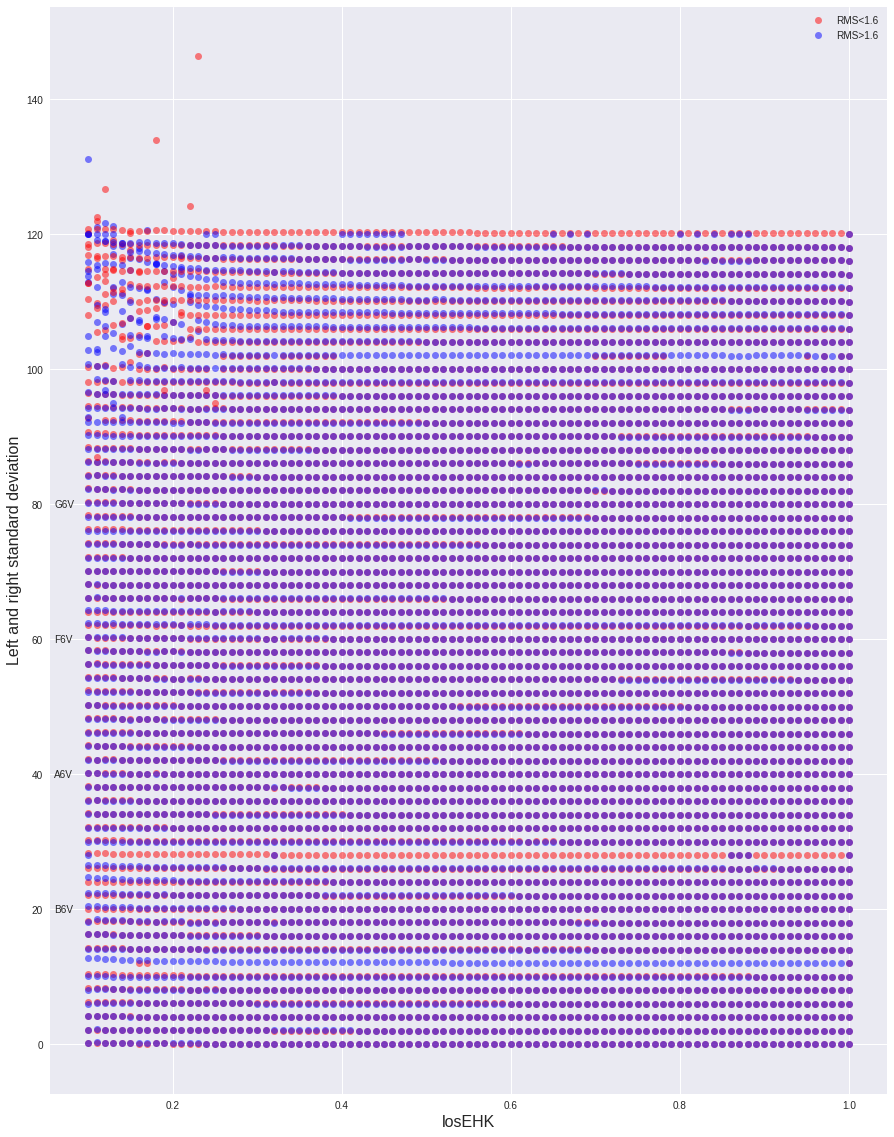

In [11]:
#plotting each spectral type with a 2 unit spacing
plt.figure(figsize=(15,20))

for k in range(1,61):
  plt.subplot(1,1,1)
  plt.plot(los,RMSLESS[k]+(2*k),'ro', alpha=0.5)        
  plt.plot(los,RMSMORE[k]+(2*k),'bo', alpha=0.5)

#here I plotted the first spectral type seperately to get a legend on the image
plt.plot(los,RMSLESS[0],'ro', label='RMS<1.6',alpha=0.5)
plt.plot(los,RMSMORE[0],'bo', Label='RMS>1.6',alpha=0.5)

plt.ylabel('Left and right standard deviation' , fontsize=16)
plt.xlabel('losEHK',fontsize=16)
plt.legend(loc='best')
plt.text(0.06,19.5,r'B6V')                    #labeling a few of the spectral types
plt.text(0.06,39.5,r'A6V')
plt.text(0.06,59.5,r'F6V')
plt.text(0.06,79.5,r'G6V')
plt.show()

This mashing of points feel chaotic and hard to see any trends lets try looking at it with connected lines.

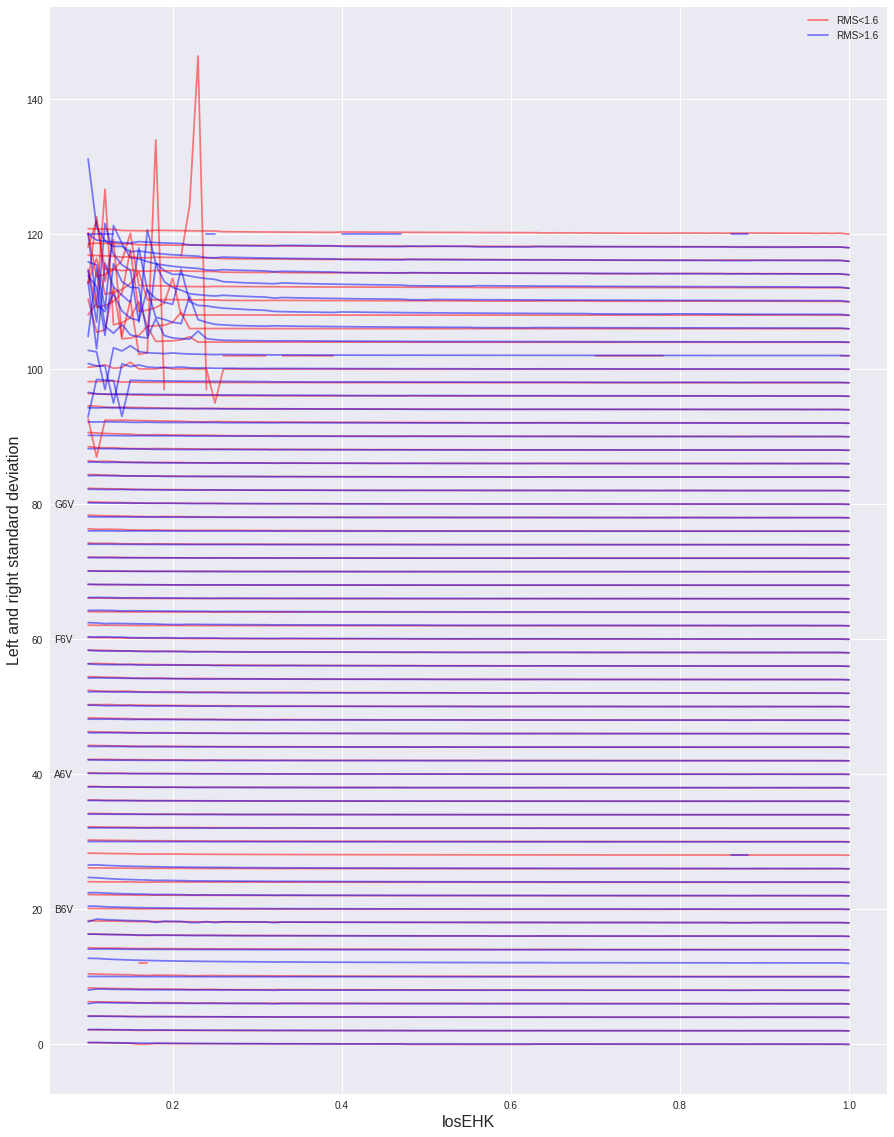

In [12]:
#plotting each spectral type with a 2 unit spacing
plt.figure(figsize=(15,20))

for k in range(1,61):
  plt.subplot(1,1,1)
  plt.plot(los,RMSLESS[k]+(2*k),'r',alpha=0.5)        
  plt.plot(los,RMSMORE[k]+(2*k),'b',alpha=0.5)

#here I plotted the first spectral type seperately to get a legend on the image
plt.plot(los,RMSLESS[0],'r', label='RMS<1.6',alpha=0.5)
plt.plot(los,RMSMORE[0],'b', Label='RMS>1.6',alpha=0.5)

plt.ylabel('Left and right standard deviation' , fontsize=16)
plt.xlabel('losEHK',fontsize=16)
plt.legend(loc='best')
plt.text(0.06,19.5,r'B6V')
plt.text(0.06,39.5,r'A6V')
plt.text(0.06,59.5,r'F6V')
plt.text(0.06,79.5,r'G6V')
plt.show()

Now we are going to do all the exact same thing that we did before but now we will have at standard bin value of 5.

First we need to creat some new arrays for these values to go into. For simplicity I will use the same names as before but attach a 5 to the end of it so we know that this is different with a standard bin of 5. 

In [0]:
RMSLESS5=np.zeros((61,91))          #Making arrays to hold all the information for left and right for all the spectral types. 
RMSMORE5=np.zeros((61,91))

Now we will fill these new arrays in the same way as last time but by changing stdbins from 2 to 5. I will also be adjusting the data collection array names so that we put this new data into the right place.  

In [14]:
#put the left and right side of each spectral type into my 2d array this time with stdbins=5


for k in sptypes:  #going through each spectral type and assigning it to meanbin 
  meanbin = k
  stdbins = 5      ### Changed this to 5###
  
  for i in range(0,90,1):       #changing the losEHK from 0.1 to 1 
    losR=1.6
    losEHK=los[i]         #this goes from 0.1 to 1 in incriments of 0.1
    losEJH=losR*losEHK

    # Calculate the error-free photometry, all spectral types
    simJH=losEJH+intJH
    simHK=losEHK+intHK
  
  
    # Sample the probability distribution:
    # customize the probability distribution
    prob = prob_bins(x,meanbin,stdbins) 
    # randomly choose a set of bin indices based on that probability
    nums = np.random.choice(x, size = 100000, p = prob) 

    R=(simJH[meanbin]-intJH[nums])/(simHK[meanbin]-intHK[nums])

  
    RMSl=np.sqrt(np.mean((R[R<1.6]-1.6)**2))  #RMS_R <1.6
    RMSg=np.sqrt(np.mean((R[R>1.6]-1.6)**2))  #RMS_R >1.6

    RMSLESS5[k][i]=RMSl   #RMS less than 1.6 array for spectral type l position i
    RMSMORE5[k][i]=RMSg  #RMS greater than 1.6 array for spectral type l position i 
    

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:23: RuntimeWarning: divide by zero encountered in divide


We know that there are some major outliers in our data so below is a cell that identifies where they are much like we did for the standard bin of 2. this data has more outliers 

In [15]:
##identifying all the outliers in standard bin 5##
total=0
for k in range(0,60):#looking at each spectral type
  name=SpType[k]
  for i in range(0,90):    #looking through each deviation for each line of sight value
    if RMSLESS5[k][i]>100:
      print('LESS Outlier:',name,'bin:',k, '  los value:', i, RMSLESS5[k][i] )       #printing out positions of outliers and their values
      total=total+1
      
    if RMSMORE5[k][i]>100:
      print('MORE Outlier:',name,'bin:',k, '  los value:', i, RMSMORE5[k][i])        #printing out positions of outliers and their values
      total=total+1
      
print('total outliers for stdbin5:',total)

('MORE Outlier:', 'O6V', 'bin:', 0, '  los value:', 0, inf)
('LESS Outlier:', 'O6V', 'bin:', 0, '  los value:', 2, 165832104628755.94)
('MORE Outlier:', 'O7V', 'bin:', 1, '  los value:', 1, 106380967637019.05)
('LESS Outlier:', 'O7V', 'bin:', 1, '  los value:', 2, inf)
('MORE Outlier:', 'O8V', 'bin:', 2, '  los value:', 1, 145320441241017.84)
('LESS Outlier:', 'O8V', 'bin:', 2, '  los value:', 2, inf)
('MORE Outlier:', 'O9V', 'bin:', 3, '  los value:', 1, 106227949579462.88)
('MORE Outlier:', 'B0V', 'bin:', 4, '  los value:', 1, 132644657825283.31)
('LESS Outlier:', 'B0V', 'bin:', 4, '  los value:', 2, inf)
('MORE Outlier:', 'B1V', 'bin:', 5, '  los value:', 0, 124885491784183.25)
('LESS Outlier:', 'B1V', 'bin:', 5, '  los value:', 1, inf)
('MORE Outlier:', 'B2V', 'bin:', 6, '  los value:', 1, 886031718741052.6)
('MORE Outlier:', 'B2V', 'bin:', 6, '  los value:', 2, inf)
('LESS Outlier:', 'B4V', 'bin:', 8, '  los value:', 0, inf)
('LESS Outlier:', 'B6V', 'bin:', 10, '  los value:', 0, 

Now we want to find where all the Not a Number Values are. Like before I have run through each data point in each spectral type and noted when the values nan. There seems to ba a trend here an all of the nan values occur in the RMSless values, not the right and in the two spectral types B2V and K7V. These were the two that held all the nan values earlier for the standard bin 2. 

In [16]:
## finding non a number values (nan)## 
for k in range(0,60):
  name=SpType[k]
  for i in range(0,90):
    if np.isnan(RMSLESS[k][i]) == True:
      print('LESS NaN:', name,'bin:', k,' los value:',i, RMSLESS[k][i])

('LESS NaN:', 'B2V', 'bin:', 6, ' los value:', 0, nan)
('LESS NaN:', 'B2V', 'bin:', 6, ' los value:', 1, nan)
('LESS NaN:', 'B2V', 'bin:', 6, ' los value:', 2, nan)
('LESS NaN:', 'B2V', 'bin:', 6, ' los value:', 3, nan)
('LESS NaN:', 'B2V', 'bin:', 6, ' los value:', 4, nan)
('LESS NaN:', 'B2V', 'bin:', 6, ' los value:', 5, nan)
('LESS NaN:', 'B2V', 'bin:', 6, ' los value:', 8, nan)
('LESS NaN:', 'B2V', 'bin:', 6, ' los value:', 9, nan)
('LESS NaN:', 'B2V', 'bin:', 6, ' los value:', 10, nan)
('LESS NaN:', 'B2V', 'bin:', 6, ' los value:', 11, nan)
('LESS NaN:', 'B2V', 'bin:', 6, ' los value:', 12, nan)
('LESS NaN:', 'B2V', 'bin:', 6, ' los value:', 13, nan)
('LESS NaN:', 'B2V', 'bin:', 6, ' los value:', 14, nan)
('LESS NaN:', 'B2V', 'bin:', 6, ' los value:', 15, nan)
('LESS NaN:', 'B2V', 'bin:', 6, ' los value:', 16, nan)
('LESS NaN:', 'B2V', 'bin:', 6, ' los value:', 17, nan)
('LESS NaN:', 'B2V', 'bin:', 6, ' los value:', 18, nan)
('LESS NaN:', 'B2V', 'bin:', 6, ' los value:', 19, nan)


In [0]:
#for k in range(0,60):                                      #plotting each spectral type seperately 
#  name=SpType[k]
#  plt.plot(los,RMSLESS5[k],'ro', label='RMS_<1.6', alpha=0.5)
#  plt.plot(los, RMSMORE5[k],'bo',label='RMS_>1.6', alpha=0.5)          #plot of delta sigma and sigma on the same axies
#  plt.title(name, fontsize=20)
#  plt.xlabel('losEHK',fontsize=16)
#  plt.legend(loc='best')
#  print('meanbin is',k)
#  plt.show()

wowza this has a lot of plots with major outliers: K7V (bin 51), K6V (bin 51), K5V (bin 49), K$V (bin 48), K2V (bin 46), K0V (bin44), G6V(bin 6V), G4V (bin 38), G0V (bin 34), B6V (bin10), B4V (bin 8), B3V (bin 7), B2V (bin 6), B1V (bin 5), B0V(bin 4), O9V (bin 3), O8V (bin 2), O7V (bin 1), O6V (bin 0)...

So this is like a bajillion spectral types to comb through. Below I run through each array and identifying all the points that are over 100 in value. When looking at the plots above I noticed that none of them ran up to or over 100 so I set any value that was over 100 equal to -5 so that when we put them all on the big plot they simply do not appear. 

In [0]:
for k in range(0,60):      #looking at each spectral type
  for i in range(0,90):    #looking through each deviation for each line of sight value
    if RMSLESS5[k][i]>100:
      RMSLESS5[k][i]=-5       #shifting outliers down to make important parts visible
   
    if RMSMORE5[k][i]>100:
      RMSMORE5[k][i]=-5      #shifting outliers down to make important parts visible


Now to make a big plot like before with right and left side of each spectral type plotted. There is a 2unit spacing between each spectral type. This is for a standard bin of 5 instead of 2.

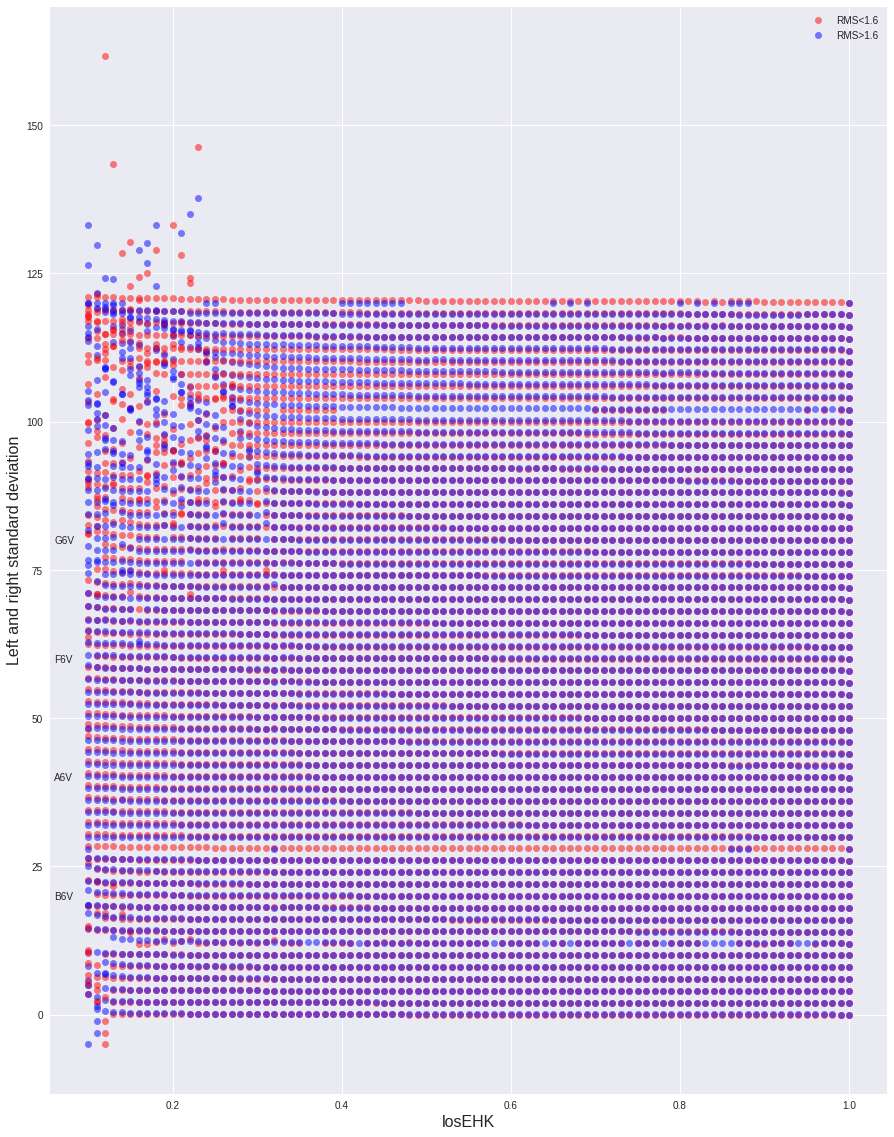

In [18]:

#plotting each spectral type with a 2 unit spacing
plt.figure(figsize=(15,20))

for k in range(1,61):
  plt.subplot(1,1,1)
  plt.plot(los,RMSLESS5[k]+(2*k),'ro', alpha=0.5)        
  plt.plot(los,RMSMORE5[k]+(2*k),'bo', alpha=0.5)

#here I plotted the first spectral type seperately to get a legend on the image
plt.plot(los,RMSLESS5[0],'ro', label='RMS<1.6',alpha=0.5)
plt.plot(los,RMSMORE5[0],'bo', Label='RMS>1.6',alpha=0.5)

plt.ylabel('Left and right standard deviation' , fontsize=16)
plt.xlabel('losEHK',fontsize=16)
plt.legend(loc='best')
plt.text(0.06,19.5,r'B6V')                    #labeling a few of the spectral types
plt.text(0.06,39.5,r'A6V')
plt.text(0.06,59.5,r'F6V')
plt.text(0.06,79.5,r'G6V')
plt.show()

Now to look at the plot above but this time with lines instead of dots. 

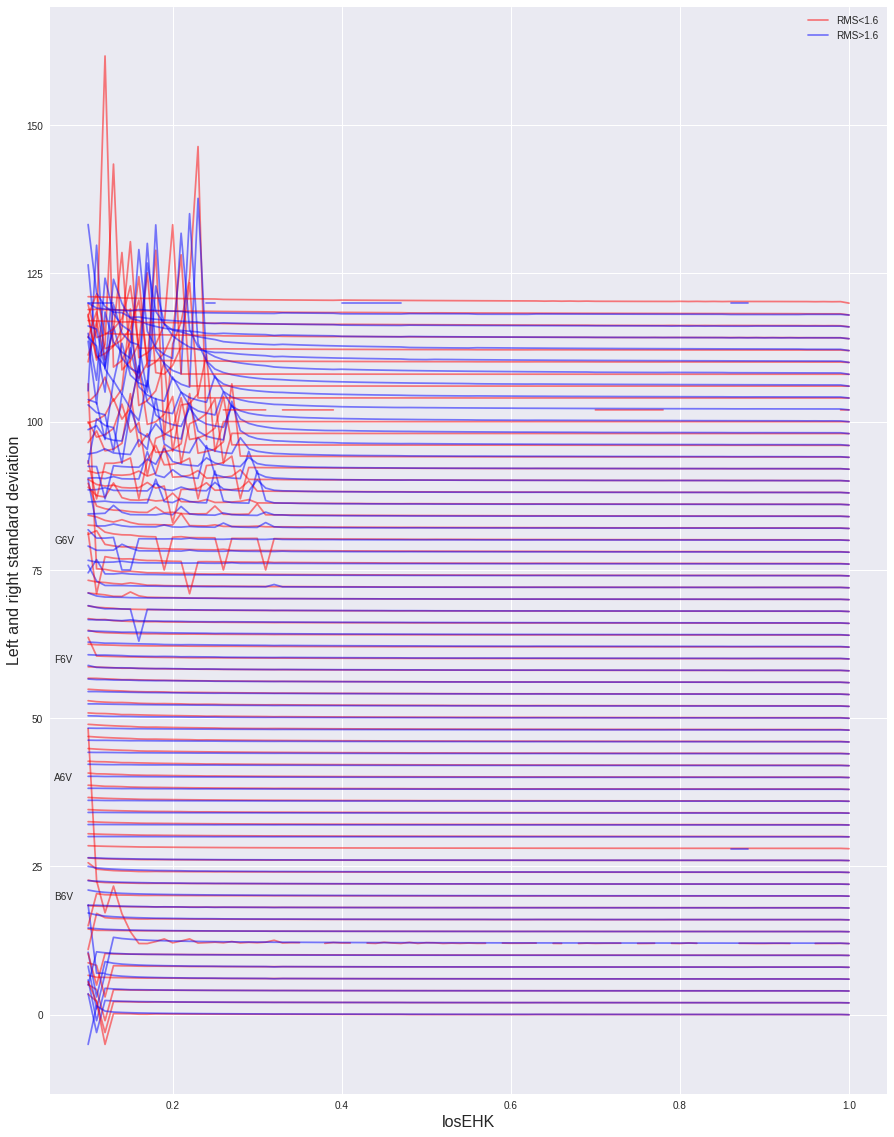

In [19]:
#plotting each spectral type with a 2 unit spacing
plt.figure(figsize=(15,20))

for k in range(1,61):
  plt.subplot(1,1,1)
  plt.plot(los,RMSLESS5[k]+(2*k),'r', alpha=0.5)        
  plt.plot(los,RMSMORE5[k]+(2*k),'b', alpha=0.5)

#here I plotted the first spectral type seperately to get a legend on the image
plt.plot(los,RMSLESS5[0],'r', label='RMS<1.6',alpha=0.5)
plt.plot(los,RMSMORE5[0],'b', Label='RMS>1.6',alpha=0.5)

plt.ylabel('Left and right standard deviation' , fontsize=16)
plt.xlabel('losEHK',fontsize=16)
plt.legend(loc='best')
plt.text(0.06,19.5,r'B6V')                    #labeling a few of the spectral types
plt.text(0.06,39.5,r'A6V')
plt.text(0.06,59.5,r'F6V')
plt.text(0.06,79.5,r'G6V')
plt.show()

Above we went through can calculated all the spots where we got NaN values. these seemd to show up only in two spectral types B2V (bin 6) and K7V (bin 51) for both standardbin trials, 2 and 5. I would like to take a closer look at these two spectral types to see why this is happening. For comparison to a spectral type that actually worked I will use spectral type O7V (bin1)

In [24]:
print('for spectral type:', SpType[6], 'the intJH value is',intJH[6], 'and the intHK value is', intHK[6])
print('for spectral type:', SpType[51], 'the intJH value is',intJH[51], 'and the intHK value is', intHK[51])

print('for spectral type:', SpType[1], 'the intJH value is',intJH[1], 'and the intHK value is', intHK[1])

('for spectral type:', 'B2V', 'the intJH value is', -0.025, 'and the intHK value is', -0.09)
('for spectral type:', 'K7V', 'the intJH value is', 0.66, 'and the intHK value is', 0.13)
('for spectral type:', 'O7V', 'the intJH value is', -0.065, 'and the intHK value is', -0.09)


Now i would like to look at each section of the code and figure out where things go wrong. I have messed around with different parts of the code and I think things go wonky with R and most likely when we put R into our root mean squared. 

In [38]:
for k in [1,6,51]:
  meanbin=k
  stdbins = 2
  print(SpType[k])
  for i in range(0,90,1):       #changing the losEHK from 0.1 to 1 
    losR=1.6
    losEHK=los[i]         #this goes from 0.1 to 1 in incriments of 0.1
    losEJH=losR*losEHK
  
    # Calculate the error-free photometry, all spectral types
    simJH=losEJH+intJH
    simHK=losEHK+intHK
    
  
    # Sample the probability distribution:
    # customize the probability distribution
    prob = prob_bins(x,meanbin,stdbins) 
    # randomly choose a set of bin indices based on that probability
    nums = np.random.choice(x, size = 100000, p = prob) 

    R=(simJH[meanbin]-intJH[nums])/(simHK[meanbin]-intHK[nums])
  
    RMSl=np.sqrt(np.mean((R[R<1.6]-1.6)**2))  #RMS_R <1.6
    RMSg=np.sqrt(np.mean((R[R>1.6]-1.6)**2))  #RMS_R >1.6
    
    if np.isnan(RMSl) == True:
      print('LESS NaN:', SpType[k],'the R for this value is',R )
    ###RMSLESS[k][i]=RMSl   #RMS less than 1.6 array for spectral type l position i
    ###RMSMORE[k][i]=RMSg  #RMS greater than 1.6 array for spectral type l position i 
    

O7V
B2V
('LESS NaN:', 'B2V', 'the R for this value is', array([2.3       , 2.57142857, 3.        , ..., 2.125     , 2.57142857,
       1.6       ]))
('LESS NaN:', 'B2V', 'the R for this value is', array([2.23636364, 2.8       , 2.45      , ..., 2.45      , 2.06666667,
       2.23636364]))
('LESS NaN:', 'B2V', 'the R for this value is', array([2.35555556, 2.02      , 1.6       , ..., 2.35555556, 2.2       ,
       1.6       ]))
('LESS NaN:', 'B2V', 'the R for this value is', array([2.15      , 2.13846154, 1.98181818, ..., 1.98181818, 2.28      ,
       1.6       ]))
('LESS NaN:', 'B2V', 'the R for this value is', array([1.6       , 2.1       , 1.6       , ..., 2.1       , 1.95      ,
       2.10769231]))
('LESS NaN:', 'B2V', 'the R for this value is', array([2.16666667, 1.6       , 1.6       , ..., 2.07142857, 1.6       ,
       1.6       ]))
('LESS NaN:', 'B2V', 'the R for this value is', array([1.8625    , 1.8625    , 2.05333333, ..., 1.87777778, 1.92      ,
       2.05333333]))
('LES

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:21: RuntimeWarning: divide by zero encountered in divide


('LESS NaN:', 'K7V', 'the R for this value is', array([1.6       , 1.64137784, 1.64285714, ..., 1.89247312, 1.64285714,
       1.6       ]))
('LESS NaN:', 'K7V', 'the R for this value is', array([1.63928626, 2.25714286, 1.67648634, ..., 1.67648634, 1.63928626,
       1.64090909]))
('LESS NaN:', 'K7V', 'the R for this value is', array([1.6       , 1.74545455, 1.66299074, ..., 1.6326788 , 1.6       ,
       1.6       ]))
('LESS NaN:', 'K7V', 'the R for this value is', array([1.64812942, 1.6       , 1.62727273, ..., 1.6252477 , 1.6252477 ,
       1.7929078 ]))
('LESS NaN:', 'K7V', 'the R for this value is', array([1.65753425, 1.64285714, 1.6       , ..., 1.64285714, 1.62195122,
       1.6       ]))
('LESS NaN:', 'K7V', 'the R for this value is', array([1.69195402, 1.62142857, 1.69195402, ..., 1.61953598, 1.6       ,
       1.69195402]))
('LESS NaN:', 'K7V', 'the R for this value is', array([1.63599698, 1.61905696, 1.64090909, ..., 1.61905696, 1.61905696,
       1.62093023]))
('LESS NaN:',

it looks to me like there are no less than 1.6 values in here at all.. maybe that is why we get so man NaN values. 